In [63]:
# The above code block can be placed at the beginning of the .py file to prevent unnecessary warnings from appearing during operation.
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
# However, it should be noted that ignoring warnings may lead to incompatibility issues in future versions, so in actual development, it is best to take appropriate actions based on the content of the warning rather than ignoring it directly.

In [64]:
# Import the data set and output the class name of each column of the data set, as follows:
import pandas as pd
diabetes = pd.read_csv("diabetes.csv")
print(diabetes.columns)  # check the column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [65]:
# I tried deleting all rows containing 0, but this resulted in a significant reduction in data volume. So instead of doing that I used the method of replacing the 0 values with the average
# diabetes = diabetes[(diabetes['BloodPressure'] != 0) & (diabetes['SkinThickness'] != 0) & (diabetes['Insulin'] != 0)]
# Replace zero values in BloodPressure, SkinThickness, and Insulin with the average value of the corresponding feature
# diabetes['BloodPressure'].replace(0, diabetes['BloodPressure'].mean(), inplace=True)
# diabetes['SkinThickness'].replace(0, diabetes['SkinThickness'].mean(), inplace=True)
# diabetes['Insulin'].replace(0, diabetes['Insulin'].mean(), inplace=True)

# Calculate the average of a specific feature based on the Outcome category
mean_values = diabetes.groupby('Outcome').mean()[['BloodPressure', 'SkinThickness', 'Insulin']]

# replace zero value
for feature in ['BloodPressure', 'SkinThickness', 'Insulin']:
    for outcome in [0, 1]:
        subset = diabetes[diabetes['Outcome'] == outcome]
        zero_indices = subset[subset[feature] == 0].index
        diabetes.loc[zero_indices, feature] = mean_values.loc[outcome, feature]

diabetes.head()     # default n = 5，show five rows
# the results 0 means not having diabetes,1 means having diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,100.335821,33.6,0.627,50,1
1,1,85,66.0,29.000000,68.792000,26.6,0.351,31,0
2,8,183,64.0,22.164179,100.335821,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1


In [66]:
# get the cows and cols of diabetes
print("dimension of diabetes data: {}".format(diabetes.shape)) 
# group the "Outcome" data to get the number of each group
print(diabetes.groupby('Outcome').size())
# The code outputs two results: the number of rows and columns of the csv file; the statistics of 0 and 1 in the "Outcome" column.

dimension of diabetes data: (768, 9)
Outcome
0    500
1    268
dtype: int64


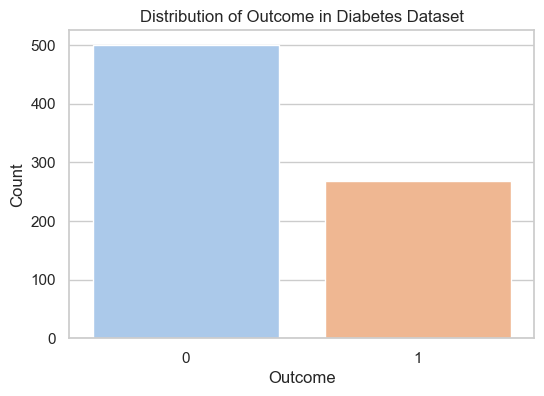

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# This line of code sets Seaborn's drawing style to white grid, making the graphics look clearer.
sns.set(style="whitegrid")

# Draw a bar chart
plt.figure(figsize=(6, 4))  # Set graphic size
sns.countplot(x='Outcome', data=diabetes, palette='pastel')  # Draw a bar chart
plt.title('Distribution of Outcome in Diabetes Dataset')
plt.xlabel('Outcome')
plt.ylabel('Count')

# display graphics
plt.show()

In [68]:
# Separate the data set and randomly divide it into training subsets and test subsets
from sklearn.model_selection import train_test_split
diabetes.info()     # get the diatebes' info
x_train, x_test, y_train, y_test = train_test_split(
    diabetes.loc[:, diabetes.columns != 'Outcome'],
    diabetes['Outcome'], stratify=diabetes['Outcome'],
    random_state=66)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


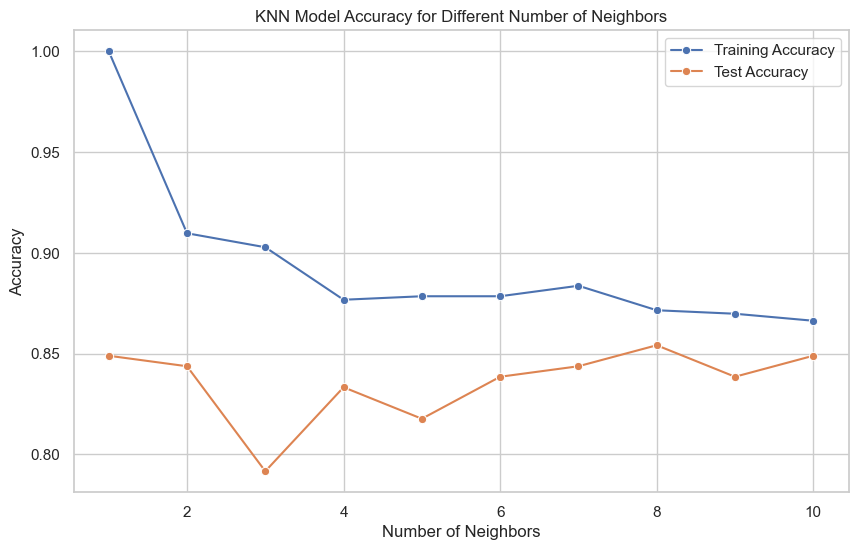

In [69]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
# In the loop, for each number of neighbors, a K-nearest neighbor classifier is created, the model is fit to the training data, and then the accuracy on the training and test sets is calculated and recorded.
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the models
    knn.fit(x_train, y_train)  # use x_train as train data and y_train as target value
    training_accuracy.append(knn.score(x_train, y_train))  # record training set accuracy
    test_accuracy.append(knn.score(x_test, y_test))  # record test set accuracy

'''
The relationship between the training set and the test set on the model prediction
accuracy (Y-axis) and the number of nearest neighbors (X-axis) is demonstrated
'''
import seaborn as sns
import matplotlib.pyplot as plt
# Create a graph with seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # Set graphic size

# Plot training set accuracy and test set accuracy curves
sns.lineplot(x=neighbors_settings, y=training_accuracy, label="Training Accuracy", marker='o')
sns.lineplot(x=neighbors_settings, y=test_accuracy, label="Test Accuracy", marker='o')

# Add figure title and axis labels
plt.title("KNN Model Accuracy for Different Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Show legend
plt.legend()

# display graphics
plt.show()

In [70]:
# In order to achieve the highest accuracy for both the training set and the test set, we select 9 neighboring points, that is, n_neghbors=9.
# select n_neighbors = 8
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
# Based on the previous step, we chose n_neighbors=9 to simulate the KNN algorithm and output the accuracy of KNN classification training
print("Accuracy of K-NN classifier on training set: {:.2f}".format(knn.score(x_train, y_train)))
print("Accuracy of K-NN classifier on test set: {:.2f}".format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.85


In [71]:
# Now try to use cross-validation method to split the training set and test set

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd

# Read the dataset (replace with your dataset path)
diabetes = pd.read_csv('diabetes.csv')

# Calculate the average of a specific feature based on the Outcome category
mean_values = diabetes.groupby('Outcome').mean()[['BloodPressure', 'SkinThickness', 'Insulin']]

# replace zero value
for feature in ['BloodPressure', 'SkinThickness', 'Insulin']:
    for outcome in [0, 1]:
        subset = diabetes[diabetes['Outcome'] == outcome]
        zero_indices = subset[subset[feature] == 0].index
        diabetes.loc[zero_indices, feature] = mean_values.loc[outcome, feature]
# Define the range of the number of neighbors for the KNN model
param_grid = {'n_neighbors': range(1, 12)}

# Create KNN model
knn = KNeighborsClassifier()

# Create a stratified cross-validation object
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)

# Hyperparameter tuning using grid search
grid_search = GridSearchCV(knn, param_grid, cv=kf)
grid_search.fit(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'])

# Output the best hyperparameters
print("Best Parameters: ", grid_search.best_params_)

# Using KNN in a loop for model training and evaluation
for train_index, test_index in kf.split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome']):
    x_train, x_test = diabetes.loc[:, diabetes.columns != 'Outcome'].iloc[train_index], diabetes.loc[:, diabetes.columns != 'Outcome'].iloc[test_index]
    y_train, y_test = diabetes['Outcome'].iloc[train_index], diabetes['Outcome'].iloc[test_index]

    # Create KNN model (using optimal hyperparameters)
    knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

    # Train the model on the training set
    knn.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(x_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Output model performance indicators
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{report}')


Best Parameters:  {'n_neighbors': 9}
Accuracy: 0.8116883116883117
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       100
           1       0.76      0.69      0.72        54

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154

Accuracy: 0.8311688311688312
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       100
           1       0.77      0.74      0.75        54

    accuracy                           0.83       154
   macro avg       0.82      0.81      0.81       154
weighted avg       0.83      0.83      0.83       154

Accuracy: 0.9025974025974026
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       100
           1       0.88      0.83      0.86 